## Download Data

In [2]:
#change the path to get the location of data
%cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
!wget "https://uwoca-my.sharepoint.com/:u:/g/personal/cbravoro_uwo_ca/Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1"


--2021-12-05 14:15:31--  https://uwoca-my.sharepoint.com/:u:/g/personal/cbravoro_uwo_ca/Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1
Resolving uwoca-my.sharepoint.com (uwoca-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to uwoca-my.sharepoint.com (uwoca-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/cbravoro_uwo_ca/Documents/Clases/Western/FM%209528A%20Banking%20Analytics/2021/Coursework%203%20-%20Deep%20Learning/LiDARTiles.tar.gz [following]
--2021-12-05 14:15:31--  https://uwoca-my.sharepoint.com/personal/cbravoro_uwo_ca/Documents/Clases/Western/FM%209528A%20Banking%20Analytics/2021/Coursework%203%20-%20Deep%20Learning/LiDARTiles.tar.gz
Reusing existing connection to uwoca-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 3115530847 (2.9G) [application/x-gzip]
Saving to: ‘Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1’

Ea8hL1Qqz-1DqXPUkFg 100%[=

In [ ]:
!tar xvzf coursework3data

Streaming output truncated to the last 5000 lines.
LIDAR/LIDAR_44106.png
LIDAR/LIDAR_44923.png
LIDAR/LIDAR_53196.png
LIDAR/LIDAR_8048.png
LIDAR/LIDAR_15465.png
LIDAR/LIDAR_30877.png
LIDAR/LIDAR_2042.png
LIDAR/LIDAR_60609.png
LIDAR/LIDAR_34366.png
LIDAR/LIDAR_41583.png
LIDAR/LIDAR_28125.png
LIDAR/LIDAR_58223.png
LIDAR/LIDAR_48019.png
LIDAR/LIDAR_28588.png
LIDAR/LIDAR_57918.png
LIDAR/LIDAR_39447.png
LIDAR/LIDAR_19309.png
LIDAR/LIDAR_57428.png
LIDAR/LIDAR_46093.png
LIDAR/LIDAR_46502.png
LIDAR/LIDAR_7744.png
LIDAR/LIDAR_35079.png
LIDAR/LIDAR_17913.png
LIDAR/LIDAR_37680.png
LIDAR/LIDAR_43946.png
LIDAR/LIDAR_39855.png
LIDAR/LIDAR_44976.png
LIDAR/LIDAR_45309.png
LIDAR/LIDAR_60868.png
LIDAR/LIDAR_34691.png
LIDAR/LIDAR_46933.png
LIDAR/LIDAR_23102.png
LIDAR/LIDAR_32937.png
LIDAR/LIDAR_58215.png
LIDAR/LIDAR_40345.png
LIDAR/LIDAR_44265.png
LIDAR/LIDAR_36266.png
LIDAR/LIDAR_27579.png
LIDAR/LIDAR_61794.png
LIDAR/LIDAR_42679.png
LIDAR/LIDAR_33577.png
LIDAR/LIDAR_44072.png
LIDAR/LIDAR_23951.png
LIDAR/

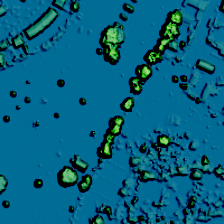

In [ ]:
from IPython.display import Image
Image(filename='LIDAR/LIDAR_54937.png') 

In [3]:
import numpy as np
import h5py as h5py
import PIL

# Others
import numpy as np
from sklearn.model_selection import train_test_split


# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Image and directories
import cv2
import os

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow import keras

In [4]:
import pandas as pd
label=pd.read_csv("EmbeddingData_C3_9528.csv")

In [4]:
label=label[['id', 'health']]

In [20]:
#function to convert id into image file name 
def append_ext(x):
  return "LIDAR_"+str(x)+".png"

label['id']=label['id'].apply(append_ext)

In [7]:
label.head()

,id,health
0,LIDAR_48552.png,-1.345
1,LIDAR_46571.png,-1.345
2,LIDAR_21161.png,-0.782
3,LIDAR_26188.png,-0.328
4,LIDAR_46276.png,-0.143


In [8]:
#split labels into train and test data
label_train, label_test=train_test_split(label, test_size=0.2, shuffle=True, random_state=201256082)

In [9]:
label_train.shape, label_test.shape

((29378, 2), (7345, 2))

# CNN Model Based on VGG16

## Data Generator

In [11]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-86c1c67c-23c2-b888-61ee-9a0aad6baab3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# prepare data augmentation configuration. One for train, one for test.
train_datagen = ImageDataGenerator(
                                  rescale=1./255,                         # NNets like small inputs. Rescale.
                                  shear_range=0.2,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=True,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=1./255,                       # NNets like small inputs. Rescale.
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                  # Flip horizontally?
                                  vertical_flip=False,                    # Flip vertically?
                                  preprocessing_function=preprocess_input,# VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0                    # No validation cut for test.
                                  )


# We will use a batch size of 128. Depends on RAM of GPU.
batch_size = 128

# data directory
data_dir = 'LIDAR'

# VGG requires 224 x 224 images.
(img_height, img_width) = (224, 224)

train_generator = train_datagen.flow_from_dataframe(
                                                    dataframe=label_train, 
                                                    directory=data_dir, # Where are the pics
                                                    x_col="id",
                                                    y_col="health",
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'training',                 # What subset to use?
                                                    shuffle = True                       # Shuffle the data?
                                                    )

validation_generator = train_datagen.flow_from_dataframe(
                                                    dataframe=label_train, 
                                                    directory=data_dir, # Where are the pics
                                                    x_col="id",
                                                    y_col="health",
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'validation',               # What subset to use?
                                                    shuffle = True                       # Shuffle the data?
                                                    )

# Test data generator.
test_generator = test_datagen.flow_from_dataframe(
                                                  dataframe=label_test, 
                                                  directory=data_dir, # Where are the pics
                                                  x_col="id",
                                                  y_col="health",
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size, 
                                                  class_mode='raw',
                                                  shuffle = False # Test set does NOT shuffle the data.
                                                  )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 23502 validated image filenames.
Found 5875 validated image filenames.
Found 7345 validated image filenames.


## Model Architecture

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
model = VGG16(weights = 'imagenet',      # The weights from the ImageNet competition
              include_top = False,       # Do not include the top layer, which classifies.
              input_shape= (224, 224, 3) # Input shape. Three channels, and BGR (NOT RGB!!!)
             )

58900480/58889256 [==============================] - 0s 0us/step


Check the initial VGG16 model

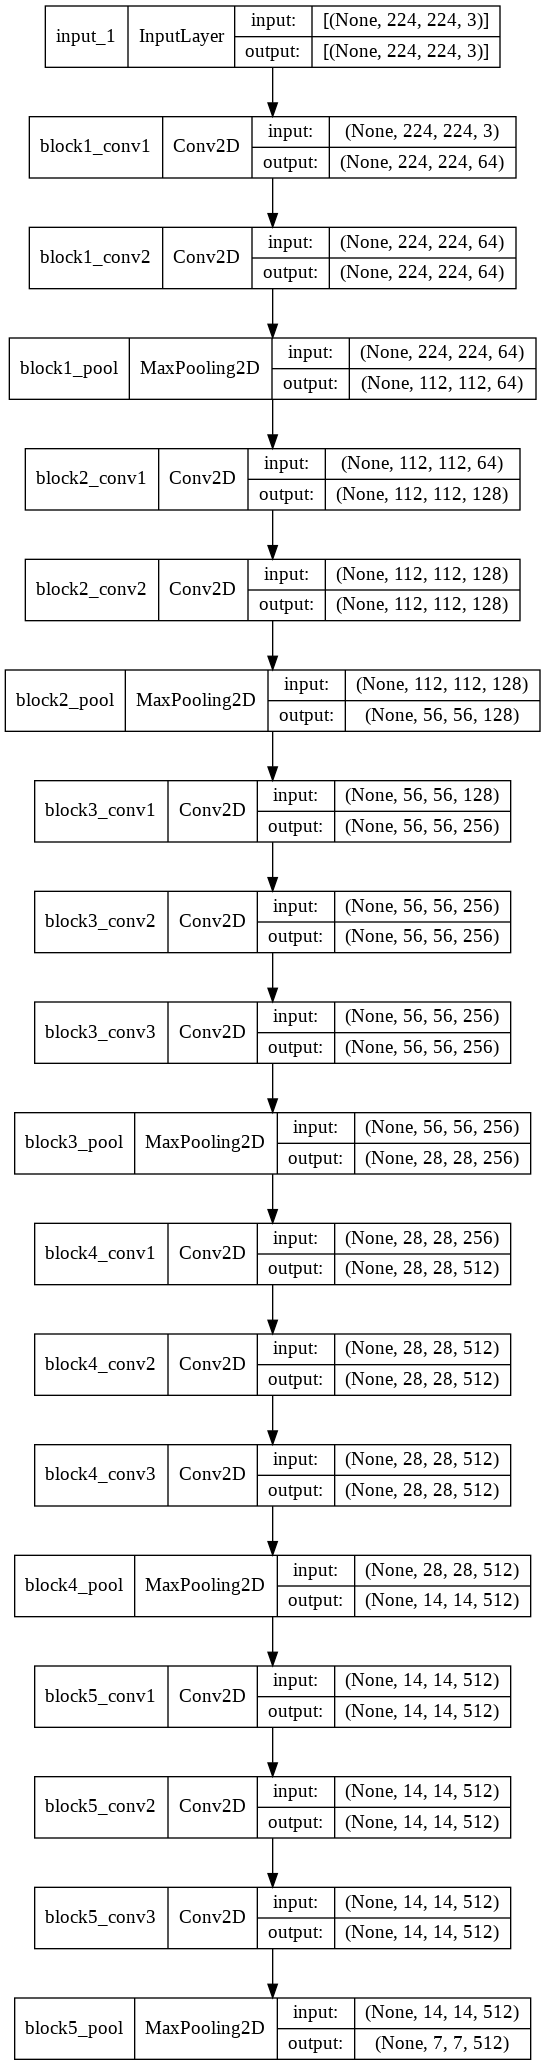

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, show_shapes=True, show_layer_names=True, to_file='GraphModel.png')
Image(retina=True, filename='GraphModel.png')

In [ ]:
# Create new model
CBModel = Sequential()

# Copy the layers to our new model. This needs to be done as there is a bug in Keras.
for layer in model.layers:
    CBModel.add(layer)

# Set the layers as untrainable
for layer in CBModel.layers:
    layer.trainable = False

In [ ]:
CBModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

Since ImageNet does not contain lidar data. we have to make some layers to be trainable to improve model predictive power.

In [ ]:
# Set layer as trainable
CBModel.layers[15].trainable = True
CBModel.layers[16].trainable = True

In [ ]:
# We now add the new layers for prediction.
CBModel.add(Flatten(input_shape=model.output_shape[1:]))
CBModel.add(Dense(64, activation = 'relu'))
CBModel.add(Dropout(0.5))
CBModel.add(Dense(64, activation = 'relu'))
CBModel.add(Dropout(0.5))
CBModel.add(Dense(1, activation = 'linear'))

In [ ]:
# How does the model look like?
CBModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
# Make sure we have frozen the correct layers
for i, layer in enumerate(CBModel.layers):
    print(i, layer.name, layer.trainable)

0 block1_conv1 False
1 block1_conv2 False
2 block1_pool False
3 block2_conv1 False
4 block2_conv2 False
5 block2_pool False
6 block3_conv1 False
7 block3_conv2 False
8 block3_conv3 False
9 block3_pool False
10 block4_conv1 False
11 block4_conv2 False
12 block4_conv3 False
13 block4_pool False
14 block5_conv1 False
15 block5_conv2 True
16 block5_conv3 True
17 block5_pool False
18 flatten True
19 dense True
20 dropout True
21 dense_1 True
22 dropout_1 True
23 dense_2 True


In [ ]:
# Compiling the model!
import tensorflow.keras as keras
opt = optimizers.Adam(learning_rate=1e-5,            # Learning rate needs to be tweaked for convergence and be small!
                      decay=1e-3 / 200    # Decay of the LR 10^-3 / 1 / 50 / 100 / 200
                      ) 
CBModel.compile(loss=keras.losses.MeanSquaredError(), 
              optimizer=opt,
              )

In [ ]:
# Define callbacks

checkpoint_path='checkpoints/VGG16Model.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)
filename='log.csv'
my_callbacks = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=3),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
    
    tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

]

# Number of epochs
epochs = 10

# Train!
CBModel.fit(
            train_generator, # Pass the train generator
            epochs=epochs, # Pass the epochs
            validation_data=validation_generator, # Pass the validation generator
            steps_per_epoch = 32,  # Usually cases / batch_size = 184.
            validation_steps = 22,  # Number of validation steps. Again cases / batch_size = 42.
            callbacks=my_callbacks # Add the callbacks
                  )

Epoch 1/10
32/32 [==============================] - 1978s 62s/step - loss: 0.9930 - val_loss: 0.5671
Epoch 2/10
32/32 [==============================] - 1442s 46s/step - loss: 0.6761 - val_loss: 0.5278
Epoch 3/10
32/32 [==============================] - 1107s 35s/step - loss: 0.6137 - val_loss: 0.4805
Epoch 4/10
32/32 [==============================] - 840s 26s/step - loss: 0.5876 - val_loss: 0.4594
Epoch 5/10
32/32 [==============================] - 676s 21s/step - loss: 0.5915 - val_loss: 0.4500
Epoch 6/10
32/32 [==============================] - 532s 17s/step - loss: 0.5771 - val_loss: 0.4589
Epoch 7/10
32/32 [==============================] - 486s 15s/step - loss: 0.5550 - val_loss: 0.4251
Epoch 8/10
32/32 [==============================] - 426s 13s/step - loss: 0.5593 - val_loss: 0.4387
Epoch 9/10
32/32 [==============================] - 326s 10s/step - loss: 0.5597 - val_loss: 0.4298
Epoch 10/10
32/32 [==============================] - 326s 10s/step - loss: 0.5436 - val_loss: 0.4

In [ ]:
#read the loss history
loss_history_VGG=pd.read_csv('log.csv')
loss_history_VGG

,epoch,loss,val_loss
0,0,0.993050,0.567076
1,1,0.676148,0.527779
2,2,0.613694,0.480487
3,3,0.587636,0.459353
4,4,0.591461,0.450001
5,5,0.577060,0.458918
6,6,0.554970,0.425107
7,7,0.559288,0.438688
8,8,0.559712,0.429760
9,9,0.543558,0.429707


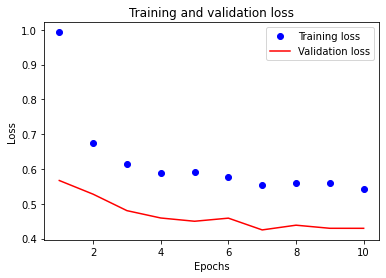

In [ ]:
# Plotting training history.
loss = CBModel.history.history['loss']
val_loss = CBModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's restore the best model

In [ ]:
CBModel.load_weights('/content/drive/MyDrive/Colab Notebooks/checkpoints/VGG16Model.07-0.43.h5')

## Test Prediction

In [ ]:
# Applying to the test set with a generator.
test_generator.reset()

# Get probabilities
output = CBModel.predict(test_generator)

In [ ]:
#save the output
from numpy import savetxt
savetxt('ypred_VGG.csv', output)

In [ ]:
#load output
from numpy import loadtxt
output = loadtxt('ypred_VGG.csv')

In [54]:
def R_squared(ytrue, ypred):
  ytrue, ypred=np.array(ytrue).reshape(-1), np.array(ypred).reshape(-1)
  SSE=np.sum((ytrue-ypred)**2)
  SST=np.sum((ytrue-np.mean(ytrue))**2)
  return (1-SSE/SST)*100

In [ ]:
R2=R_squared(test_generator.labels, output)
print(f"The R2 score is {R2}%")

The R2 score is 14.363197717015519%


In [55]:
def mean_squared_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true).reshape(-1), np.array(y_pred).reshape(-1)
    return np.mean((y_true-y_pred)**2)

In [ ]:
MSE = mean_squared_error(test_generator.labels, output)
print(f'The mean squared error over the test is {MSE}')

The mean squared error over the test is 0.44644985374626234


# CNN model based on ResNet

## Data Generator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
# prepare data augmentation configuration. One for train, one for test.
train_datagen = ImageDataGenerator(
                                  rescale=None,                             # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=None,                           # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                  # Flip horizontally?
                                  vertical_flip=False,                    # Flip vertically?
                                  preprocessing_function=preprocess_input,# VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0                    # No validation cut for test.
                                  )


# We will use a batch size of 128. Depends on RAM of GPU.
batch_size = 128

# data directory
data_dir = 'LIDAR'

# VGG requires 224 x 224 images.
(img_height, img_width) = (224, 224)

train_generator = train_datagen.flow_from_dataframe(
                                                    dataframe=label_train, 
                                                    directory=data_dir, # Where are the pics
                                                    x_col="id",
                                                    y_col="health",
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'training',                 # What subset to use?
                                                    shuffle = True                       # Shuffle the data?
                                                    )

validation_generator = train_datagen.flow_from_dataframe(
                                                    dataframe=label_train, 
                                                    directory=data_dir, # Where are the pics
                                                    x_col="id",
                                                    y_col="health",
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'validation',               # What subset to use?
                                                    shuffle = True                       # Shuffle the data?
                                                    )

# Test data generator.
test_generator = test_datagen.flow_from_dataframe(
                                                  dataframe=label_test, 
                                                  directory=data_dir, # Where are the pics
                                                  x_col="id",
                                                  y_col="health",
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size, 
                                                  class_mode='raw',
                                                  shuffle = False # Test set does NOT shuffle the data.
                                                  )

Found 23503 validated image filenames.
Found 5875 validated image filenames.
Found 7345 validated image filenames.


## Model Architecture

In [ ]:
# Import base model. Using ResNet50v2.
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

# Import model with input layer
base_model = ResNet50V2(weights = 'imagenet',     # The weights from the ImageNet competition
                      include_top = False,       # Do not include the top layer, which classifies.
                      input_shape= (224, 224, 3) # Input shape. Three channels.
                      )

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
# Set the base model to trainable first.
base_model.trainable = False

In [ ]:
# Create the full model using the Model API

# Input layer
ImageSize=(224, 224)
inputs = keras.Input(shape=ImageSize + (3,),
                        name = 'image_only_input')

# Add the ResNet model, setting it to be untrainable. 
# First we store it on a temporary variable.
x = base_model(inputs, training=False)

# Flatten to make it the same size as the original model
x = Flatten()(x)

# Now we actually add it to a layer. Note the way of writing it.
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Add final output layer.
outputs = Dense(1, activation='linear')(x)

# Create the complete model object
ImageOnlyModel = keras.Model(inputs, outputs)

In [ ]:
# This is what the model looks like now.
ImageOnlyModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_only_input (InputLaye  [(None, 224, 224, 3)]    0         
 r)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                             

In [ ]:
# check which layers are frozen
for i, layer in enumerate(ImageOnlyModel.layers):
    print(i, layer.name, layer.trainable)

0 image_only_input True
1 resnet50v2 False
2 flatten True
3 dense True
4 dropout True
5 dense_1 True
6 dropout_1 True
7 dense_2 True


In [ ]:
# Compiling the model!
import tensorflow.keras as keras
opt = optimizers.Adam(learning_rate=1e-5,            # Learning rate needs to be tweaked for convergence and be small!
                      decay=1e-3 / 200    # Decay of the LR 10^-3 / 1 / 50 / 100 / 200
                      ) 
ImageOnlyModel.compile(loss=keras.losses.MeanSquaredError(), 
              optimizer=opt,
              )

Model Warm up

In [ ]:
# Number of epochs
epochs = 2

# Train!
ImageOnlyModel.fit(
                  train_generator,
                  epochs=epochs,
                  validation_data=validation_generator,
                  steps_per_epoch = 92, 
                  validation_steps = 22 
                  )

Epoch 1/2
92/92 [==============================] - 244s 3s/step - loss: 1.8739 - val_loss: 0.5879
Epoch 2/2
92/92 [==============================] - 231s 3s/step - loss: 0.8904 - val_loss: 0.5883


After model warm-up, set ResNet layers as trainable and recompile the model

In [ ]:
base_model.trainable = True

#recompile as we changed things
ImageOnlyModel.compile(loss=keras.losses.MeanSquaredError(), 
              optimizer=opt,
              )

ImageOnlyModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_only_input (InputLaye  [(None, 224, 224, 3)]    0         
 r)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                             

In [ ]:
# check which layers are frozen
for i, layer in enumerate(ImageOnlyModel.layers):
    print(i, layer.name, layer.trainable)

0 image_only_input True
1 resnet50v2 True
2 flatten True
3 dense True
4 dropout True
5 dense_1 True
6 dropout_1 True
7 dense_2 True


In [ ]:
# Define callbacks

checkpoint_path='checkpoint_ResNet_Withwarmup/ResNet50V2.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)
filename='log_ResNet50V2_Withwarmup.csv'
my_callbacks = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=3),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
    
    tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

]

# Number of epochs
epochs = 10

# Train!
ImageOnlyModel.fit(
            train_generator, # Pass the train generator
            epochs=epochs, # Pass the epochs
            validation_data=validation_generator, # Pass the validation generator
            steps_per_epoch = 92,  # Usually cases / batch_size = 184.
            validation_steps = 22,  # Number of validation steps. Again cases / batch_size = 42.
            callbacks=my_callbacks # Add the callbacks
                  )

Epoch 1/10
92/92 [==============================] - 250s 3s/step - loss: 0.7254 - val_loss: 0.5072
Epoch 2/10
92/92 [==============================] - 244s 3s/step - loss: 0.6473 - val_loss: 0.5046
Epoch 3/10
92/92 [==============================] - 246s 3s/step - loss: 0.6074 - val_loss: 0.4587
Epoch 4/10
92/92 [==============================] - 246s 3s/step - loss: 0.5842 - val_loss: 0.4359
Epoch 5/10
92/92 [==============================] - 239s 3s/step - loss: 0.5529 - val_loss: 0.4034
Epoch 6/10
92/92 [==============================] - 236s 3s/step - loss: 0.5438 - val_loss: 0.4466
Epoch 7/10
92/92 [==============================] - 235s 3s/step - loss: 0.5495 - val_loss: 0.4510
Epoch 8/10
92/92 [==============================] - 237s 3s/step - loss: 0.5492 - val_loss: 0.4430


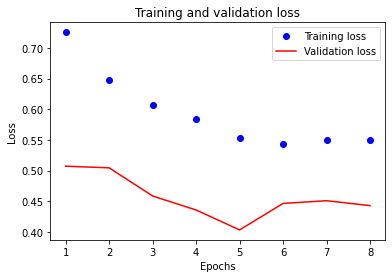

In [ ]:
# Plotting training history.
loss = ImageOnlyModel.history.history['loss']
val_loss = ImageOnlyModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's restore the best model

In [ ]:
ImageOnlyModel.load_weights('/content/drive/MyDrive/Colab Notebooks/checkpoint_ResNet_Withwarmup/ResNet50V2.05-0.40.h5')

## Test Prediction

In [ ]:
# Applying to the test set with a generator.
test_generator.reset()

# Get probabilities
output = ImageOnlyModel.predict(test_generator)

In [ ]:
#save the output
from numpy import savetxt
savetxt('ypred_ResNet_withWarmUp.csv', output)

In [ ]:
#load output
from numpy import loadtxt
output = loadtxt('ypred_ResNet_withWarmUp.csv')

In [ ]:
R2=R_squared(test_generator.labels, output)
print(f"The R2 score is {R2}%")

The R2 score is 19.728205843898785%


In [ ]:
MSE = mean_squared_error(test_generator.labels, output)
print(f'The mean squared error over the test is {MSE}')

The mean squared error over the test is 0.4184804874254643


# Grad CAM

### Max health index=1.57

In [ ]:
#get the image id which has the maximum health deprivation index
max_idx=label['health'].max()
label[label['health']==max_idx]

,id,health
7760,LIDAR_42995.png,1.57
22007,LIDAR_43242.png,1.57
28395,LIDAR_42996.png,1.57


In [ ]:
# The explainer. Gotten from https://keras.io/examples/vision/grad_cam/
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    from tensorflow import keras
    import tensorflow as tf
    # First, we create a model that maps the input image to the activations
    # of the last conv layer. This layer is located at model.layers[1] as the
    # ResNet model is the first "layer" of the ImageOnlyModel. Modify as needed.
    last_conv_layer = model.layers[1].get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.layers[1].inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    regression_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = regression_input
    for layer_name in classifier_layer_names:
        try:
            x = model.get_layer(layer_name)(x)
        except:
            x = model.layers[1].get_layer(layer_name)(x)
    regression_model = keras.Model(regression_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute predictions
        top_class_channel = regression_model(last_conv_layer_output)

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the regression
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

In [ ]:
# Set the layers.
last_conv_layer_name = "conv5_block3_out"
classifier_layer_names =  ["flatten", "dense", "dropout", "dense_1", "dropout_1", "dense_2"]

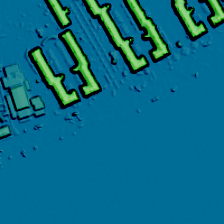

In [ ]:
# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Get the image in the right size
def get_img_array(img_path, size = (224, 224)):
    import tensorflow as tf
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    array = preprocess_input(array)
    return array

# Get an image
img_path = 'LIDAR/LIDAR_43242.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

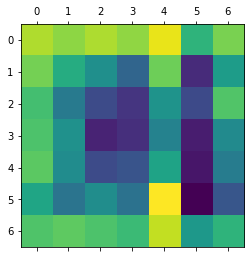

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

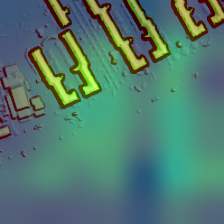

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "House_Example.jpg"
# superimposed_img.save(save_path)

# Display Grad RAM
display(superimposed_img)


## Health index=1.013

In [ ]:
label[label['health']==1.013]

,id,health
1366,LIDAR_60098.png,1.013
11478,LIDAR_59352.png,1.013
14217,LIDAR_59106.png,1.013
20196,LIDAR_59850.png,1.013
21404,LIDAR_60346.png,1.013
28681,LIDAR_60345.png,1.013
29058,LIDAR_59602.png,1.013
32539,LIDAR_59353.png,1.013
34529,LIDAR_59603.png,1.013
35304,LIDAR_59354.png,1.013


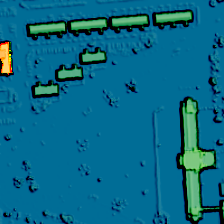

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_59354.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

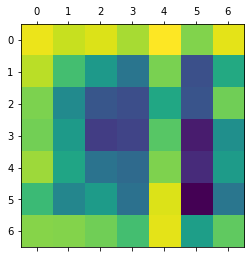

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

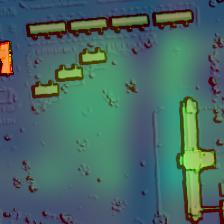

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

## Health index=0.5

In [ ]:
label[label['health']==0.5]

,id,health
3410,LIDAR_51451.png,0.5
4946,LIDAR_50210.png,0.5
5362,LIDAR_52196.png,0.5
5520,LIDAR_50955.png,0.5
6374,LIDAR_37055.png,0.5
6818,LIDAR_52195.png,0.5
9153,LIDAR_50707.png,0.5
10123,LIDAR_50706.png,0.5
10194,LIDAR_51452.png,0.5
10863,LIDAR_50954.png,0.5


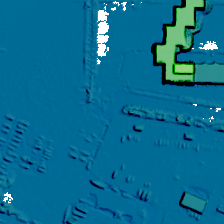

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_52690.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

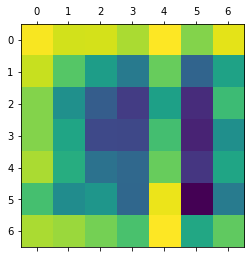

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

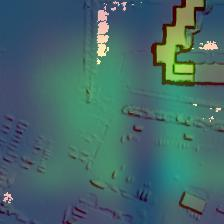

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

##  Health index=0

In [ ]:
#get the image id which has 0 health deprivation index
label[label['health']==0]

,id,health
6006,LIDAR_37050.png,0.0
7235,LIDAR_37298.png,0.0
8433,LIDAR_37051.png,0.0
9376,LIDAR_44336.png,0.0
12273,LIDAR_38073.png,0.0
17568,LIDAR_37052.png,0.0
17835,LIDAR_44584.png,0.0
21407,LIDAR_38072.png,0.0
30121,LIDAR_37825.png,0.0
31770,LIDAR_37297.png,0.0


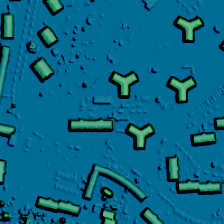

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_44336.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

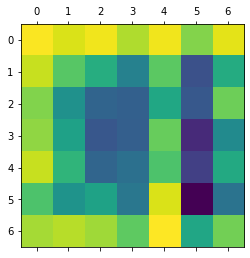

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

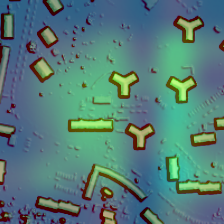

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "House_Example.jpg"
# superimposed_img.save(save_path)

# Display Grad RAM
display(superimposed_img)

## Health index=-0.5

In [ ]:
label[label['health']==-0.5]

,id,health
3147,LIDAR_16930.png,-0.5
3858,LIDAR_60329.png,-0.5
4892,LIDAR_17175.png,-0.5
5981,LIDAR_60824.png,-0.5
7096,LIDAR_17178.png,-0.5
8057,LIDAR_38596.png,-0.5
11340,LIDAR_38843.png,-0.5
13447,LIDAR_60576.png,-0.5
14728,LIDAR_38595.png,-0.5
15779,LIDAR_52913.png,-0.5


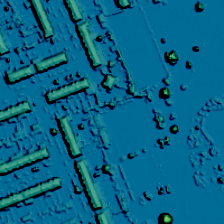

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_52914.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

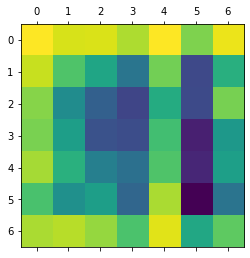

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

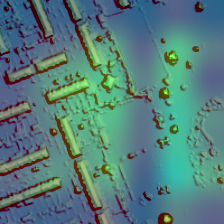

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "House_Example.jpg"
# superimposed_img.save(save_path)

# Display Grad RAM
display(superimposed_img)

## Health index=-1

In [ ]:
#get the image id which has 0 health deprivation index
label[label['health']==-1]

,id,health
3198,LIDAR_27697.png,-1.0
4284,LIDAR_27450.png,-1.0
13207,LIDAR_27698.png,-1.0
30802,LIDAR_27699.png,-1.0


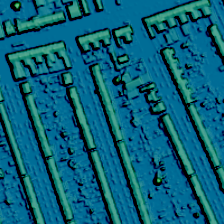

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_27450.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

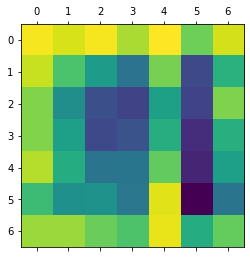

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

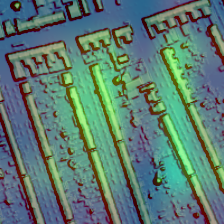

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "House_Example.jpg"
# superimposed_img.save(save_path)

# Display Grad RAM
display(superimposed_img)

## Health index=-1.5

In [ ]:
label[label['health']==-1.5]

,id,health
2799,LIDAR_52766.png,-1.5
4177,LIDAR_28352.png,-1.5
4629,LIDAR_28351.png,-1.5
7474,LIDAR_52020.png,-1.5
8817,LIDAR_51772.png,-1.5
9048,LIDAR_52269.png,-1.5
9733,LIDAR_28350.png,-1.5
10650,LIDAR_51527.png,-1.5
10837,LIDAR_52266.png,-1.5
11638,LIDAR_51526.png,-1.5


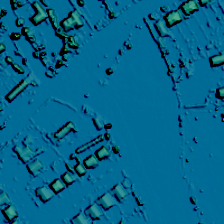

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_52022.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

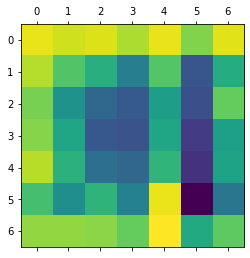

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

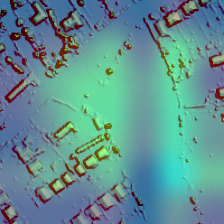

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "House_Example.jpg"
# superimposed_img.save(save_path)

# Display Grad RAM
display(superimposed_img)

## Health index=-2.03

In [ ]:
label[label['health']==-2.03]

,id,health
14280,LIDAR_31350.png,-2.03
20206,LIDAR_31349.png,-2.03
22273,LIDAR_31102.png,-2.03
24800,LIDAR_30855.png,-2.03
27065,LIDAR_31103.png,-2.03
35308,LIDAR_30856.png,-2.03


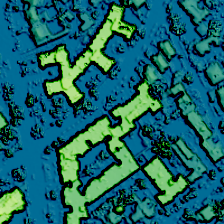

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_31102.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

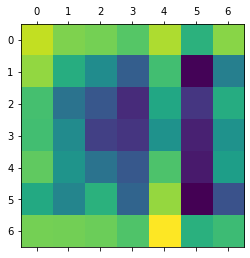

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

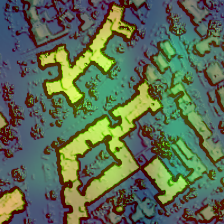

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "House_Example.jpg"
# superimposed_img.save(save_path)

# Display Grad RAM
display(superimposed_img)

## Health index=-2.528

In [ ]:
label[label['health']==-2.528]

,id,health
802,LIDAR_32108.png,-2.528
2730,LIDAR_32602.png,-2.528
3201,LIDAR_31611.png,-2.528
3386,LIDAR_32357.png,-2.528
4464,LIDAR_32604.png,-2.528
5585,LIDAR_31113.png,-2.528
5960,LIDAR_32354.png,-2.528
6524,LIDAR_32106.png,-2.528
6661,LIDAR_31116.png,-2.528
6800,LIDAR_31365.png,-2.528


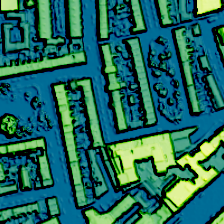

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_32111.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

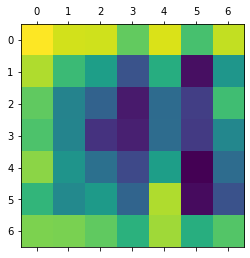

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

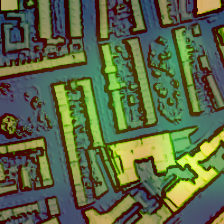

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "House_Example.jpg"
# superimposed_img.save(save_path)

# Display Grad RAM
display(superimposed_img)

##  Min Health index=-3.215

In [ ]:
#get the image id which has the minimum health deprivation index
min_idx=label['health'].min()
label[label['health']==min_idx]

,id,health
19286,LIDAR_32610.png,-3.215
22104,LIDAR_32859.png,-3.215
29479,LIDAR_32611.png,-3.215


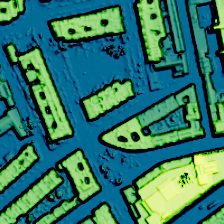

In [ ]:
# Get an image
img_path = 'LIDAR/LIDAR_32611.png'
data = get_img_array(img_path)

# Plot it
display(Image(img_path))

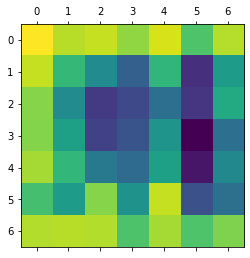

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

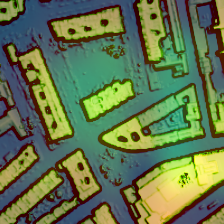

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "House_Example.jpg"
# superimposed_img.save(save_path)

# Display Grad RAM
display(superimposed_img)

# MultiModal Learning

In [25]:
df=pd.read_csv("EmbeddingData_C3_9528.csv")

In [26]:
df=df[['id', 'LSOA11CD', 'health']]

In [27]:
df['id']=df['id'].apply(append_ext)

In [28]:
df.head()

,id,LSOA11CD,health
0,LIDAR_48552.png,E01000759,-1.345
1,LIDAR_46571.png,E01000759,-1.345
2,LIDAR_21161.png,E01000487,-0.782
3,LIDAR_26188.png,E01004572,-0.328
4,LIDAR_46276.png,E01033320,-0.143


In [29]:
df=pd.get_dummies(df, columns=['LSOA11CD'], drop_first=True)

In [30]:
df.head()

,id,health,LSOA11CD_E01000002,LSOA11CD_E01000003,LSOA11CD_E01000005,LSOA11CD_E01000006,LSOA11CD_E01000007,LSOA11CD_E01000008,LSOA11CD_E01000009,LSOA11CD_E01000010,LSOA11CD_E01000011,LSOA11CD_E01000012,LSOA11CD_E01000013,LSOA11CD_E01000014,LSOA11CD_E01000015,LSOA11CD_E01000016,LSOA11CD_E01000017,LSOA11CD_E01000018,LSOA11CD_E01000019,LSOA11CD_E01000020,LSOA11CD_E01000021,LSOA11CD_E01000022,LSOA11CD_E01000023,LSOA11CD_E01000024,LSOA11CD_E01000025,LSOA11CD_E01000027,LSOA11CD_E01000031,LSOA11CD_E01000033,LSOA11CD_E01000034,LSOA11CD_E01000035,LSOA11CD_E01000036,LSOA11CD_E01000037,LSOA11CD_E01000038,LSOA11CD_E01000039,LSOA11CD_E01000040,LSOA11CD_E01000041,LSOA11CD_E01000042,LSOA11CD_E01000043,LSOA11CD_E01000044,LSOA11CD_E01000045,...,LSOA11CD_E01033608,LSOA11CD_E01033698,LSOA11CD_E01033699,LSOA11CD_E01033700,LSOA11CD_E01033701,LSOA11CD_E01033702,LSOA11CD_E01033703,LSOA11CD_E01033704,LSOA11CD_E01033705,LSOA11CD_E01033706,LSOA11CD_E01033707,LSOA11CD_E01033708,LSOA11CD_E01033709,LSOA11CD_E01033710,LSOA11CD_E01033711,LSOA11CD_E01033712,LSOA11CD_E01033713,LSOA11CD_E01033724,LSOA11CD_E01033725,LSOA11CD_E01033726,LSOA11CD_E01033727,LSOA11CD_E01033728,LSOA11CD_E01033729,LSOA11CD_E01033730,LSOA11CD_E01033731,LSOA11CD_E01033732,LSOA11CD_E01033733,LSOA11CD_E01033734,LSOA11CD_E01033735,LSOA11CD_E01033736,LSOA11CD_E01033737,LSOA11CD_E01033738,LSOA11CD_E01033739,LSOA11CD_E01033740,LSOA11CD_E01033741,LSOA11CD_E01033742,LSOA11CD_E01033743,LSOA11CD_E01033744,LSOA11CD_E01033745,LSOA11CD_E01033746
0,LIDAR_48552.png,-1.345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,LIDAR_46571.png,-1.345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,LIDAR_21161.png,-0.782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,LIDAR_26188.png,-0.328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LIDAR_46276.png,-0.143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#split labels into train and test data
df_train, df_test=train_test_split(df, test_size=0.2, shuffle=True, random_state=201256082)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

In [33]:
ImageSize=(224, 224)
image_input = tf.keras.Input(shape=ImageSize + (3,),
                             name = 'image_input')

# Load an empty ResNet
resnet_input = ResNet50V2(weights = 'imagenet',     # The weights from the ImageNet competition
                      include_top = False,       # Do not include the top layer, which classifies.
                      input_shape= (224, 224, 3) # Input shape. Three channels.
                      )
resnet_input.trainable = False

# Use the model API to attach it to our input layer.
ImageClassifier = resnet_input(image_input, training=False)

# Add a Flatten layer with the model API.
ImageClassifier = Flatten()(ImageClassifier)

# Now we create the structured data layer.
predictive_features = 4747 #  4747 categorical
features_input  = keras.Input(shape=(predictive_features,),
                              name="structured_data") 
Structured =  Dense( 12, activation = 'relu' )(features_input) # Add one processing layer
Structured =  Dropout(0.5)(Structured)   # Dropout after  Dense
Structured =  Dense( 6, activation = 'relu' )(Structured)
Structured =  Dropout(0.5)(Structured)   # Dropout after  Dense

# Merge all available features into a single large vector via concatenation
merged = concatenate([ImageClassifier, Structured])

# Add a few prediction layers
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.5)(merged)

img_multi = Dense(1, activation='linear', name="img_multi")(merged)

# Instantiate an end-to-end model predicting house_prices
multimodal_model = keras.Model(inputs=[image_input, features_input], 
                               outputs=[img_multi])

94683136/94668760 [==============================] - 1s 0us/step


In [34]:
# Compiling the model!
import tensorflow.keras as keras
opt = optimizers.Adam(learning_rate=1e-5,            # Learning rate needs to be tweaked for convergence and be small!
                      decay=1e-3 / 200    # Decay of the LR 10^-3 / 1 / 50 / 100 / 200
                      ) 
multimodal_model.compile(loss=keras.losses.MeanSquaredError(), 
              optimizer=opt,
              )

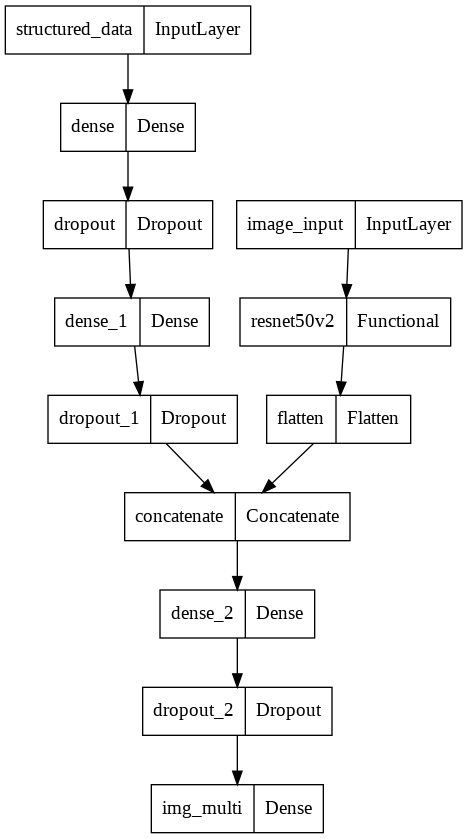

In [35]:
import pydot as pyd
from tensorflow.keras.utils import plot_model

#Visualize Model
plot_model(
          multimodal_model, to_file='model.png', show_shapes=False, show_layer_names=True,
          rankdir='TB', expand_nested=False, dpi=96
          )

Now the last part is to modify the generator. The structure is almost the same, except we need to code a custom function that will be able to process the multiple inputs and outputs. The following code accomplishes this.

In [36]:
df_train.columns

Index(['id', 'health', 'LSOA11CD_E01000002', 'LSOA11CD_E01000003',
       'LSOA11CD_E01000005', 'LSOA11CD_E01000006', 'LSOA11CD_E01000007',
       'LSOA11CD_E01000008', 'LSOA11CD_E01000009', 'LSOA11CD_E01000010',
       ...
       'LSOA11CD_E01033737', 'LSOA11CD_E01033738', 'LSOA11CD_E01033739',
       'LSOA11CD_E01033740', 'LSOA11CD_E01033741', 'LSOA11CD_E01033742',
       'LSOA11CD_E01033743', 'LSOA11CD_E01033744', 'LSOA11CD_E01033745',
       'LSOA11CD_E01033746'],
      dtype='object', length=4749)

In [64]:
# select the useful columns
pred_cols=np.r_[1:df_train.columns.shape[0]]
df_train.columns[pred_cols]

Index(['health', 'LSOA11CD_E01000002', 'LSOA11CD_E01000003',
       'LSOA11CD_E01000005', 'LSOA11CD_E01000006', 'LSOA11CD_E01000007',
       'LSOA11CD_E01000008', 'LSOA11CD_E01000009', 'LSOA11CD_E01000010',
       'LSOA11CD_E01000011',
       ...
       'LSOA11CD_E01033737', 'LSOA11CD_E01033738', 'LSOA11CD_E01033739',
       'LSOA11CD_E01033740', 'LSOA11CD_E01033741', 'LSOA11CD_E01033742',
       'LSOA11CD_E01033743', 'LSOA11CD_E01033744', 'LSOA11CD_E01033745',
       'LSOA11CD_E01033746'],
      dtype='object', length=4748)

In [52]:
# Define parameters

target_size = (224, 224)
batch_size = 128
data_dir = 'LIDAR'

# What are the useful columns? Note the position of the target. 
pred_cols=np.r_[1:df_train.columns.shape[0]]

train_datagen = ImageDataGenerator(
                                  rescale=None,                             # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=None,                           # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                  # Flip horizontally?
                                  vertical_flip=False,                    # Flip vertically?
                                  preprocessing_function=preprocess_input,# VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0                    # No validation cut for test.
                                  )
# We only modify the generators. Note the y vector.
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=data_dir,
                                                    x_col='id',
                                                    y_col=df_train.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

validation_generator = train_datagen.flow_from_dataframe(dataframe=df_train,
                                                    directory=data_dir,
                                                    x_col='id',
                                                    y_col=df_train.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='validation',
                                                    interpolation="bilinear"
                                                   )

test_generator = test_datagen.flow_from_dataframe(dataframe=df_test,
                                                    directory=data_dir,
                                                    x_col='id',
                                                    y_col=df_test.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

# Define combined generator
def train_generator_func():
    count = 0

    while True:
        if  count == len(df_train.index):
            train_generator.reset()
            break
        count += 1
        data = train_generator.next()

        # Let's identify where is what.
        target_location = 0
        predictive_columns = np.r_[1:4748]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets


def validation_generator_func():
    count = 0
    while True:
        if count == len(df_train.index):
            validation_generator.reset()
            break
        count += 1
        data = validation_generator.next()

        # Let's identify where is what.
        target_location = 0
        predictive_columns = np.r_[1:4748]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets
        
        
def test_generator_func():
    count = 0
    test_generator.reset()
    while True:
        if count == len(df_test.index):
            test_generator.reset()
            break
        count += 1
        data = test_generator.next()

        # Let's identify where is what.
        target_location = 0
        predictive_columns = np.r_[1:4748]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets

Found 23503 validated image filenames.
Found 5875 validated image filenames.
Found 7345 validated image filenames.


With this, we are ready to train. First, let's check one data / target batch from the train.

In [46]:
# This is how the data comes out now.
train_test_output = train_generator_func()
next(train_test_output)

([array([[[[-1.        , -1.        , -0.99827224],
           [-1.        , -1.        , -1.        ],
           [-1.        , -0.6344974 , -0.6896297 ],
           ...,
           [-1.        , -1.        , -0.7919092 ],
           [-1.        , -0.5305853 , -0.39937234],
           [-0.9011202 , -0.11707664, -0.04180139]],
  
          [[-1.        , -0.7856832 , -0.9464208 ],
           [-1.        , -0.4104017 , -0.509326  ],
           [-0.9817558 , -0.17151213, -0.23823828],
           ...,
           [-1.        , -0.7032784 , -0.46114028],
           [-1.        , -0.4763698 , -0.27412808],
           [-0.9835845 , -0.26770878, -0.09508991]],
  
          [[-0.8784766 , -0.24553168, -0.39364642],
           [-0.7037945 ,  0.036569  , -0.0695594 ],
           [-0.6919823 ,  0.09764767,  0.02275336],
           ...,
           [-1.        , -0.363001  , -0.15239328],
           [-1.        , -0.34617472, -0.14048928],
           [-1.        , -0.2778921 , -0.08215654]],
  
    

Train the model

In [47]:
# Warmup
# Steps and epochs
epochs=3
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = np.amax([validation_generator.samples // validation_generator.batch_size, 1])

# Train!
multimodal_model.fit(train_generator_func(),
                      epochs=epochs,
                      steps_per_epoch=steps_per_epoch,
                      validation_data=validation_generator_func(),
                      validation_steps=validation_steps
                     )

Epoch 1/3
183/183 [==============================] - 7560s 41s/step - loss: 1.1173 - val_loss: 0.4829
Epoch 2/3
183/183 [==============================] - 414s 2s/step - loss: 0.4944 - val_loss: 0.4333
Epoch 3/3
183/183 [==============================] - 398s 2s/step - loss: 0.4496 - val_loss: 0.4241


In [48]:
# Set it as trainable
resnet_input.trainable = True

# Recompile
multimodal_model.compile(loss=keras.losses.MeanSquaredError(), 
              optimizer=opt,
              )

checkpoint_path='checkpoint_multimodel/MultimodalModel.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)
filename='log_multimodel_Withwarmup.csv'
my_callbacks = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=3),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
    
    tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

]

# Steps and epochs
epochs=10
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = np.amax([validation_generator.samples // validation_generator.batch_size, 1])

# Train!
multimodal_model.fit(train_generator_func(),
                      epochs=epochs,
                      steps_per_epoch=steps_per_epoch,
                      validation_data=validation_generator_func(),
                      validation_steps=validation_steps,
                     callbacks=my_callbacks
                     )

Epoch 1/10
183/183 [==============================] - 439s 2s/step - loss: 0.4378 - val_loss: 0.3951
Epoch 2/10
183/183 [==============================] - 442s 2s/step - loss: 0.4088 - val_loss: 0.3821
Epoch 3/10
183/183 [==============================] - 438s 2s/step - loss: 0.3907 - val_loss: 0.3753
Epoch 4/10
183/183 [==============================] - 496s 3s/step - loss: 0.3784 - val_loss: 0.3751
Epoch 5/10
183/183 [==============================] - 437s 2s/step - loss: 0.3715 - val_loss: 0.3708
Epoch 6/10
183/183 [==============================] - 495s 3s/step - loss: 0.3586 - val_loss: 0.3671
Epoch 7/10
183/183 [==============================] - 436s 2s/step - loss: 0.3481 - val_loss: 0.3956
Epoch 8/10
183/183 [==============================] - 429s 2s/step - loss: 0.3399 - val_loss: 0.3741
Epoch 9/10
183/183 [==============================] - 426s 2s/step - loss: 0.3229 - val_loss: 0.3752


Plot the training and test loss

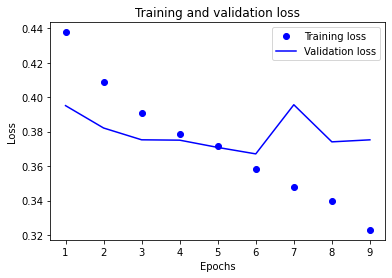

In [49]:
loss = multimodal_model.history.history['loss']
val_loss = multimodal_model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Clearly the multimodal learning is better than the previous two image-only models.

Let's restore the best model

In [50]:
multimodal_model.load_weights('/content/drive/MyDrive/Colab Notebooks/checkpoint_multimodel/MultimodalModel.06-0.37.h5')

## Test Prediction

In [53]:
# Calculate outputs in test set
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

output = multimodal_model.predict(test_generator_func(),
                                    steps=STEP_SIZE_TEST+1,
                                    verbose=1)

58/58 [==============================] - 1733s 30s/step


In [62]:
#save the output
from numpy import savetxt
savetxt('ypred_multimodalModel.csv', output)

In [60]:
R2=R_squared(test_generator.labels[:, 0], output)
print(f"The R2 score is {R2}%")

The R2 score is 29.83315094423389%


In [61]:
MSE = mean_squared_error(test_generator.labels[:,0], output)
print(f'The mean squared error over the test is {MSE}')

The mean squared error over the test is 0.3658004346690456
